In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import cvxpy as cvx
from model.distrs import StudentTDistribution as TDistribution, NormalDistribution,DiscreteDistribution
from model.distrs import E,Var,Std
from model.math_ops import D
import model.synth_data as synth
import model.utility as ut
import model.problem as pr
from helper.stats import five_stats

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = (6,4)
mpl.rcParams['font.size'] = 10
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['savefig.dpi'] = 100
plt.rc('text',usetex=True)
plt.rc('font',serif='times')


In [11]:
p_true = 80
sz = np.arange(4,p_true+1)

In [12]:
# Experiment parameters.

n_true = 50000
n_experiments = 50
λ = 3
δ = 0.2

r_threshold = 60
β = 0.5
u = ut.LinearPlateauUtility(β,r_threshold)

In [13]:
# True Market
R_true = NormalDistribution(5,10)
# X_true = [1/np.sqrt(2)*TDistribution(ν=4) for _ in range(p_true)]
X_true = [NormalDistribution(0,1) for _ in range(p_true)]
M_true = synth.GaussianMarket(X_true,R_true)

# Discretized Market
X,R = M_true.sample(n_true)

# for i in range(n_true):
#     new_Xi = X[i,:]
#     for j in range(1,len(new_Xi)):
#         s = np.random.randint(1,2001)
#         if s == 2000:
#             new_Xi[j] = 100
#         if s == 1999:
#             new_Xi[j] = -100
#     X[i,:] = new_Xi

M = synth.MarketDiscreteDistribution(X,R)

In [13]:
# Real q∗ value computation
p_star = pr.Problem(X,R,λ=0,u=u)
p_star.solve()
q_star = p_star.q

100  -4.749e+00  -4.749e+00  +4e-07  1e-16  4e-11  1e-12  3e-12  0.9890  6e-01   1  0  0 |  0  0
Maximum number of iterations reached, recovering best iterate (33) and stopping.

Close to OPTIMAL (within feastol=7.2e-09, reltol=2.0e-08, abstol=9.5e-08).
Runtime: 86.999687 seconds.

98  -4.749e+00  -4.749e+00  +4e-07  1e-16  4e-11  1e-12  3e-12  0.9890  6e-01   1  0  0 |  0  0
99  -4.749e+00  -4.749e+00  +5e-07  1e-16  5e-11  8e-13  4e-12  0.9890  6e-01   1  0  0 |  0  0
96  -4.749e+00  -4.749e+00  +4e-07  1e-16  4e-11  1e-12  3e-12  0.9890  6e-01   1  0  0 |  0  0
97  -4.749e+00  -4.749e+00  +5e-07  2e-16  5e-11  8e-13  4e-12  0.9890  6e-01   1  0  0 |  0  0
94  -4.749e+00  -4.749e+00  +4e-07  1e-16  4e-11  1e-12  3e-12  0.9890  6e-01   1  0  0 |  0  0
95  -4.749e+00  -4.749e+00  +5e-07  2e-16  5e-11  8e-13  4e-12  0.9890  6e-01   1  0  0 |  0  0
92  -4.749e+00  -4.749e+00  +4e-07  1e-16  4e-11  1e-12  3e-12  0.9890  6e-01   1  0  0 |  0  0
93  -4.749e+00  -4.749e+00  +5e-07  2e-16  5e

In [14]:
R_star_q_star = p_star.insample_cost(q_star)
CE_star_q_star = p_star.insample_CE(q_star)

## $p=O(1)$

In [66]:
ns1 = sz*10
ps1 = np.ones_like(sz)*p_true
np.array([ps1,ns1]).T

array([[ 40,  40],
       [ 40,  50],
       [ 40,  60],
       [ 40,  70],
       [ 40,  80],
       [ 40,  90],
       [ 40, 100],
       [ 40, 110],
       [ 40, 120],
       [ 40, 130],
       [ 40, 140],
       [ 40, 150],
       [ 40, 160],
       [ 40, 170],
       [ 40, 180],
       [ 40, 190],
       [ 40, 200],
       [ 40, 210],
       [ 40, 220],
       [ 40, 230],
       [ 40, 240],
       [ 40, 250],
       [ 40, 260],
       [ 40, 270],
       [ 40, 280],
       [ 40, 290],
       [ 40, 300],
       [ 40, 310],
       [ 40, 320],
       [ 40, 330],
       [ 40, 340],
       [ 40, 350],
       [ 40, 360],
       [ 40, 370],
       [ 40, 380],
       [ 40, 390],
       [ 40, 400]])

In [0]:
qs1 = np.zeros(shape=(len(ns1),p_true+1,n_experiments))
CEs_ins1 = np.empty(shape=(len(ns1),n_experiments))
CEs_oos1 = np.empty(shape=(len(ns1),n_experiments))

for i,(n,p) in enumerate(zip(ns1,ps1)):
    print('Sampling %d problems of size %d × %d' % (n_experiments,n,p+1))
    prs = pr.ProblemsDistribution(M,n,λ,u,Rf=0,problem_t=pr.MaskedProblem)
    prs.sample(n_experiments,{'fs':range(p+1)},par=True)
    qs1[i,:p+1,:] = prs.qs.T
    CEs_ins1[i,:] = prs.CEs_ins
    CEs_oos1[i,:] = prs.CEs_oos

Sampling 50 problems of size 400 × 41
Sampling 50 problems of size 390 × 41
Sampling 50 problems of size 380 × 41
Sampling 50 problems of size 370 × 41
Sampling 50 problems of size 360 × 41
Sampling 50 problems of size 350 × 41
Sampling 50 problems of size 340 × 41
Sampling 50 problems of size 330 × 41
Sampling 50 problems of size 320 × 41
Sampling 50 problems of size 310 × 41
Sampling 50 problems of size 300 × 41
Sampling 50 problems of size 290 × 41
Sampling 50 problems of size 280 × 41
Sampling 50 problems of size 270 × 41
Sampling 50 problems of size 260 × 41
Sampling 50 problems of size 250 × 41
Sampling 50 problems of size 240 × 41
Sampling 50 problems of size 230 × 41
Sampling 50 problems of size 220 × 41
Sampling 50 problems of size 210 × 41
Sampling 50 problems of size 200 × 41
Sampling 50 problems of size 190 × 41
Sampling 50 problems of size 180 × 41
Sampling 50 problems of size 170 × 41
Sampling 50 problems of size 160 × 41
Sampling 50 problems of size 150 × 41
Sampling 50 

In [16]:
γ = u.γ
r_bar = max(R)
ξ = np.max(np.linalg.norm(X,axis=1))
δ = 0.1
norm_qstar = np.linalg.norm(q_star)
Ω = γ*r_bar**2*ξ**2/λ * (γ/(2*ns1) + (1+γ)*np.sqrt(np.log(1/δ))/np.sqrt(2*ns1))
ω = -λ*norm_qstar**2 - 8*γ**2*ξ**2*(32+np.log(1/δ))/(ns1*λ) - 2*γ*r_bar*ξ**2/λ * np.sqrt((32+np.log(1/δ))/ns1)

In [21]:
error_CE1 = CEs_oos1-CEs_ins1
center_CE1 = np.median(error_CE1,axis=1)
bottom_CE1 = np.percentile(error_CE1,10,axis=1)-center_CE1
top_CE1 = -np.percentile(error_CE1,90,axis=1)+center_CE1

error_bound1 = -(Ω/(D(u)(CEs_ins1)).T).T # double transpose is for broadcastigne
center_bound1 = np.median(error_bound1,axis=1)
bottom_bound1 = np.percentile(error_bound1,10,axis=1)-center_bound1
top_bound1 = -np.percentile(error_bound1,90,axis=1)+center_bound1

for i in range(len(top_CE1)):
    if (i+1)%3 != 0:
        bottom_CE1[i] = np.nan
        top_CE1[i] = np.nan
        bottom_bound1[i] = np.nan
        top_bound1[i] = np.nan

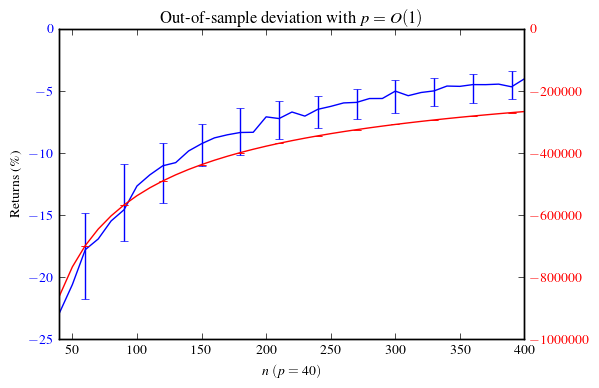

In [67]:
fig1_oos = plt.figure()
ax11_oos = fig1_oos.add_subplot(111)
ax21_oos = ax11_oos.twinx()

ax11_oos.errorbar(ns1,center_CE1,yerr=[top_CE1,bottom_CE1],color='b')
ax11_oos.axis(xmin=min(ns1))
ax11_oos.set_xlabel('$n\,\,(p=40)$')
ax11_oos.set_ylabel('Returns (\%)');
for t in ax11_oos.get_yticklabels():
    t.set_color('b')

ax21_oos.errorbar(ns1,center_bound1,yerr=[top_bound1,bottom_bound1],color='r')
ax21_oos.axis(xmin=min(ns1),ymax=0,ymin=-1000000)
for t in ax21_oos.get_yticklabels():
    t.set_color('r')

ax11_oos.set_title('Out-of-sample deviation with $p=O(1)$');

In [68]:
error_CE1sub = CE_star_q_star - CEs_oos1
center_CE1sub = np.median(error_CE1sub,axis=1)
bottom_CE1sub = np.percentile(error_CE1sub,10,axis=1)-center_CE1sub
top_CE1sub = -np.percentile(error_CE1sub,90,axis=1)+center_CE1sub

error_bound1sub = -(ω/(D(u)(CEs_oos1)).T).T
center_bound1sub = np.median(error_bound1sub,axis=1)
bottom_bound1sub = np.percentile(error_bound1sub,10,axis=1)-center_bound1sub
top_bound1sub = -np.percentile(error_bound1sub,90,axis=1)+center_bound1sub

for i in range(len(top_CE1sub)):
    if (i+1)%3 != 0:
        bottom_CE1sub[i] = np.nan
        top_CE1sub[i] = np.nan
        bottom_bound1sub[i] = np.nan
        top_bound1sub[i] = np.nan

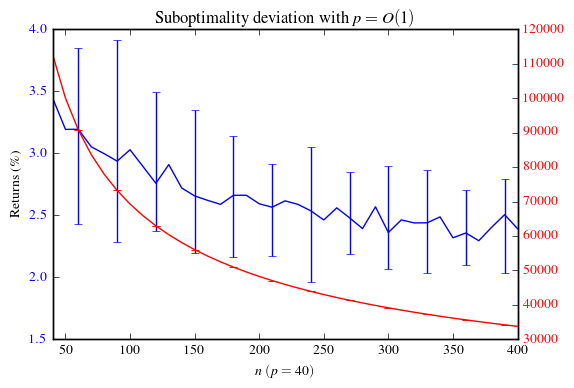

In [70]:
fig1_sub = plt.figure()
ax11_sub = fig1_sub.add_subplot(111)
ax21_sub = ax11_sub.twinx()

ax11_sub.errorbar(ns1,center_CE1sub,yerr=[top_CE1sub,bottom_CE1sub])
ax11_sub.axis(xmin=min(ns1))
ax11_sub.set_xlabel('$n\,\,(p=40)$')
ax11_sub.set_ylabel('Returns (\%)');
# ax11_sub.axis(ymax=7)
for t in ax11_sub.get_yticklabels():
    t.set_color('b')


ax21_sub.errorbar(ns1,center_bound1sub,yerr=[top_bound1sub,bottom_bound1sub],color='r')
# ax21_sub.axis(xmin=min(ns1),ymin=0,ymax=150000)
for t in ax21_sub.get_yticklabels():
    t.set_color('r')  

ax11_sub.set_title('Suboptimality deviation with $p=O(1)$');

In [71]:
ps1

array([40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40,
       40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40,
       40, 40, 40])

## $p=O(\sqrt{n})$

In [104]:
ps2 = sz
ns2 = np.floor(0.1*ps2**2)
np.array([ps2,ns2]).T

array([[   4.,    1.],
       [   5.,    2.],
       [   6.,    3.],
       [   7.,    4.],
       [   8.,    6.],
       [   9.,    8.],
       [  10.,   10.],
       [  11.,   12.],
       [  12.,   14.],
       [  13.,   16.],
       [  14.,   19.],
       [  15.,   22.],
       [  16.,   25.],
       [  17.,   28.],
       [  18.,   32.],
       [  19.,   36.],
       [  20.,   40.],
       [  21.,   44.],
       [  22.,   48.],
       [  23.,   52.],
       [  24.,   57.],
       [  25.,   62.],
       [  26.,   67.],
       [  27.,   72.],
       [  28.,   78.],
       [  29.,   84.],
       [  30.,   90.],
       [  31.,   96.],
       [  32.,  102.],
       [  33.,  108.],
       [  34.,  115.],
       [  35.,  122.],
       [  36.,  129.],
       [  37.,  136.],
       [  38.,  144.],
       [  39.,  152.],
       [  40.,  160.]])

In [105]:
n_experiments = 100

qs2 = np.zeros(shape=(len(ns2),p_true+1,n_experiments))
CEs_ins2 = np.empty(shape=(len(ns2),n_experiments))
CEs_oos2 = np.empty(shape=(len(ns2),n_experiments))

for i,(n,p) in enumerate(zip(ns2,ps2)):
    print('Sampling %d problems of size %d × %d' % (n_experiments,n,p+1))
    prs = pr.ProblemsDistribution(M,n,λ,u,Rf=0,problem_t=pr.MaskedProblem)
    prs.sample(n_experiments,{'fs':range(p+1)},par=True)
    qs2[i,:p+1,:] = prs.qs.T
    CEs_ins2[i,:] = prs.CEs_ins
    CEs_oos2[i,:] = prs.CEs_oos

Sampling 100 problems of size 160 × 41
Sampling 100 problems of size 152 × 40
Sampling 100 problems of size 144 × 39
Sampling 100 problems of size 136 × 38
Sampling 100 problems of size 129 × 37
Sampling 100 problems of size 122 × 36
Sampling 100 problems of size 115 × 35
Sampling 100 problems of size 108 × 34
Sampling 100 problems of size 102 × 33
Sampling 100 problems of size 96 × 32
Sampling 100 problems of size 90 × 31
Sampling 100 problems of size 84 × 30
Sampling 100 problems of size 78 × 29
Sampling 100 problems of size 72 × 28
Sampling 100 problems of size 67 × 27
Sampling 100 problems of size 62 × 26
Sampling 100 problems of size 57 × 25
Sampling 100 problems of size 52 × 24
Sampling 100 problems of size 48 × 23
Sampling 100 problems of size 44 × 22
Sampling 100 problems of size 40 × 21
Sampling 100 problems of size 36 × 20
Sampling 100 problems of size 32 × 19
Sampling 100 problems of size 28 × 18
Sampling 100 problems of size 25 × 17
Sampling 100 problems of size 22 × 16
Sam

In [106]:
error_CE2 = CEs_oos2-CEs_ins2
center_CE2 = np.median(error_CE2,axis=1)
bottom_CE2 = np.percentile(error_CE2,10,axis=1)-center_CE2
top_CE2 = -np.percentile(error_CE2,90,axis=1)+center_CE2

error_bound2 = -(Ω/(D(u)(CEs_ins2)).T).T # double transpose is for broadcastigne
center_bound2 = np.median(error_bound2,axis=1)
bottom_bound2 = np.percentile(error_bound2,10,axis=1)-center_bound2
top_bound2 = -np.percentile(error_bound2,90,axis=1)+center_bound2

for i in range(len(top_CE2)):
    if (i+1)%3 != 0:
        bottom_CE2[i] = np.nan
        top_CE2[i] = np.nan
        bottom_bound2[i] = np.nan
        top_bound2[i] = np.nan

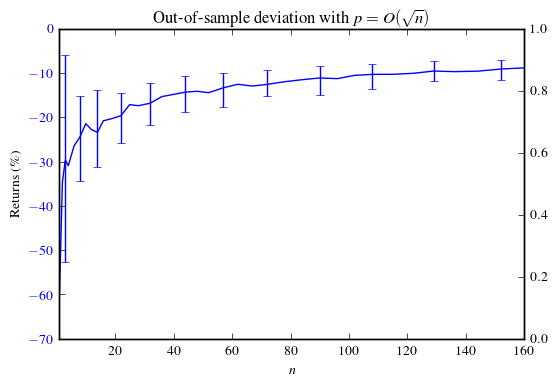

In [197]:
fig2_oos = plt.figure()
ax12_oos = fig2_oos.add_subplot(111)
ax22_oos = ax12_oos.twinx()

ax12_oos.errorbar(ns2,center_CE2,yerr=[top_CE2,bottom_CE2],color='b')
ax12_oos.axis(xmin=min(ns2))
ax12_oos.set_xlabel('$n$')
ax12_oos.set_ylabel('Returns (\%)');
for t in ax12_oos.get_yticklabels():
   t.set_color('b')

# ax22_oos.errorbar(ns2,center_bound2,yerr=[top_bound2,bottom_bound2],color='r')
# ax22_oos.axis(xmin=min(ns2),ymax=0,ymin=-1000000)
# for t in ax22_oos.get_yticklabels():
#     t.set_color('r')

ax12_oos.set_title('Out-of-sample deviation with $p=O(\sqrt{n})$');

In [108]:
error_CE2sub = CE_star_q_star - CEs_oos2
center_CE2sub = np.median(error_CE2sub,axis=1)
bottom_CE2sub = np.percentile(error_CE2sub,10,axis=1)-center_CE2sub
top_CE2sub = -np.percentile(error_CE2sub,90,axis=1)+center_CE2sub

error_bound2sub = -(ω/(D(u)(CEs_oos2)).T).T
center_bound2sub = np.median(error_bound2sub,axis=1)
bottom_bound2sub = np.percentile(error_bound2sub,10,axis=1)-center_bound2sub
top_bound2sub = -np.percentile(error_bound2sub,90,axis=1)+center_bound2sub

for i in range(len(top_CE2sub)):
    if (i+1)%3 != 0:
        bottom_CE2sub[i] = np.nan
        top_CE2sub[i] = np.nan
        bottom_bound2sub[i] = np.nan
        top_bound2sub[i] = np.nan

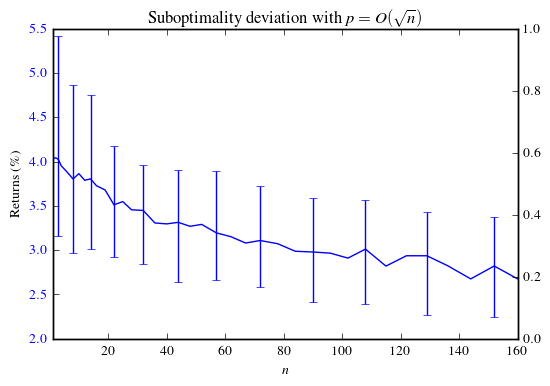

In [198]:
fig2_sub = plt.figure()
ax12_sub = fig2_sub.add_subplot(111)
ax22_sub = ax12_sub.twinx()

ax12_sub.errorbar(ns2,center_CE2sub,yerr=[top_CE2sub,bottom_CE2sub])
ax12_sub.axis(xmin=min(ns2))
ax12_sub.set_xlabel('$n$')
ax12_sub.set_ylabel('Returns (\%)');
# ax12_sub.axis(ymax=7)
for t in ax12_sub.get_yticklabels():
    t.set_color('b')


# ax22_sub.errorbar(ps2,center_bound2sub,yerr=[top_bound2sub,bottom_bound2sub],color='r')
# # ax22_sub.axis(xmin=min(ns2),ymin=0,ymax=150000)
# for t in ax22_sub.get_yticklabels():
#     t.set_color('r')

ax12_sub.set_title('Suboptimality deviation with $p=O(\sqrt{n})$');

## $p=O(n^{3/4})$

In [128]:
ps3 = sz
ns3 = np.floor(1.1*ps3**(4/3))
np.array([ps3,ns3]).T

array([[   4.,    6.],
       [   5.,    9.],
       [   6.,   11.],
       [   7.,   14.],
       [   8.,   17.],
       [   9.,   20.],
       [  10.,   23.],
       [  11.,   26.],
       [  12.,   30.],
       [  13.,   33.],
       [  14.,   37.],
       [  15.,   40.],
       [  16.,   44.],
       [  17.,   48.],
       [  18.,   51.],
       [  19.,   55.],
       [  20.,   59.],
       [  21.,   63.],
       [  22.,   67.],
       [  23.,   71.],
       [  24.,   76.],
       [  25.,   80.],
       [  26.,   84.],
       [  27.,   89.],
       [  28.,   93.],
       [  29.,   98.],
       [  30.,  102.],
       [  31.,  107.],
       [  32.,  111.],
       [  33.,  116.],
       [  34.,  121.],
       [  35.,  125.],
       [  36.,  130.],
       [  37.,  135.],
       [  38.,  140.],
       [  39.,  145.],
       [  40.,  150.]])

In [129]:
n_experiments = 100

qs3 = np.zeros(shape=(len(ns3),p_true+1,n_experiments))
CEs_ins3 = np.empty(shape=(len(ns3),n_experiments))
CEs_oos3 = np.empty(shape=(len(ns3),n_experiments))

for i,(n,p) in enumerate(zip(ns3,ps3)):
    print('Sampling %d problems of size %d × %d' % (n_experiments,n,p+1))
    prs = pr.ProblemsDisxtribution(M,n,λ,u,Rf=0,problem_t=pr.MaskedProblem)
    prs.sample(n_experiments,{'fs':range(p+1)},par=True)
    qs3[i,:p+1,:] = prs.qs.T
    CEs_ins3[i,:] = prs.CEs_ins
    CEs_oos3[i,:] = prs.CEs_oos

Sampling 100 problems of size 150 × 41
Sampling 100 problems of size 145 × 40
Sampling 100 problems of size 140 × 39
Sampling 100 problems of size 135 × 38
Sampling 100 problems of size 130 × 37
Sampling 100 problems of size 125 × 36
Sampling 100 problems of size 121 × 35
Sampling 100 problems of size 116 × 34
Sampling 100 problems of size 111 × 33
Sampling 100 problems of size 107 × 32
Sampling 100 problems of size 102 × 31
Sampling 100 problems of size 98 × 30
Sampling 100 problems of size 93 × 29
Sampling 100 problems of size 89 × 28
Sampling 100 problems of size 84 × 27
Sampling 100 problems of size 80 × 26
Sampling 100 problems of size 76 × 25
Sampling 100 problems of size 71 × 24
Sampling 100 problems of size 67 × 23
Sampling 100 problems of size 63 × 22
Sampling 100 problems of size 59 × 21
Sampling 100 problems of size 55 × 20
Sampling 100 problems of size 51 × 19
Sampling 100 problems of size 48 × 18
Sampling 100 problems of size 44 × 17
Sampling 100 problems of size 40 × 16
S

In [130]:
error_CE3 = CEs_oos3-CEs_ins3
center_CE3 = np.median(error_CE3,axis=1)
bottom_CE3 = np.percentile(error_CE3,10,axis=1)-center_CE3
top_CE3 = -np.percentile(error_CE3,90,axis=1)+center_CE3

error_bound3 = -(Ω/(D(u)(CEs_ins3)).T).T # double transpose is for broadcastigne
center_bound3 = np.median(error_bound3,axis=1)
bottom_bound3 = np.percentile(error_bound3,10,axis=1)-center_bound3
top_bound3 = -np.percentile(error_bound3,90,axis=1)+center_bound3

for i in range(len(top_CE3)):
    if (i+1)%3 != 0:
        bottom_CE3[i] = np.nan
        top_CE3[i] = np.nan
        bottom_bound3[i] = np.nan
        top_bound3[i] = np.nan

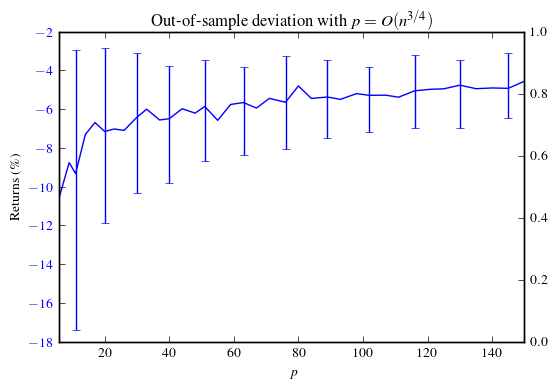

In [203]:
fig3_oos = plt.figure()
ax13_oos = fig3_oos.add_subplot(111)
ax23_oos = ax13_oos.twinx()

ax13_oos.errorbar(ns3,center_CE3,yerr=[top_CE3,bottom_CE3],color='b')
ax13_oos.axis(xmin=min(ns3),xmax=max(ns3))
ax13_oos.set_xlabel('$p$')
ax13_oos.set_ylabel('Returns (\%)');
for t in ax13_oos.get_yticklabels():
   t.set_color('b')

# ax23_oos.errorbar(ns3,center_bound3,yerr=[top_bound3,bottom_bound3],color='r')
# ax23_oos.axis(xmin=min(ns3),ymax=0,ymin=-1000000)
# for t in ax23_oos.get_yticklabels():
#     t.set_color('r')

ax13_oos.set_title('Out-of-sample deviation with $p=O(n^{3/4})$');

In [132]:
error_CE3sub = CE_star_q_star - CEs_oos3
center_CE3sub = np.median(error_CE3sub,axis=1)
bottom_CE3sub = np.percentile(error_CE3sub,10,axis=1)-center_CE3sub
top_CE3sub = -np.percentile(error_CE3sub,90,axis=1)+center_CE3sub

error_bound3sub = -(ω/(D(u)(CEs_oos3)).T).T
center_bound3sub = np.median(error_bound3sub,axis=1)
bottom_bound3sub = np.percentile(error_bound3sub,10,axis=1)-center_bound3sub
top_bound3sub = -np.percentile(error_bound3sub,90,axis=1)+center_bound3sub

for i in range(len(top_CE3sub)):
    if (i+1)%3 != 0:
        bottom_CE3sub[i] = np.nan
        top_CE3sub[i] = np.nan
        bottom_bound3sub[i] = np.nan
        top_bound3sub[i] = np.nan

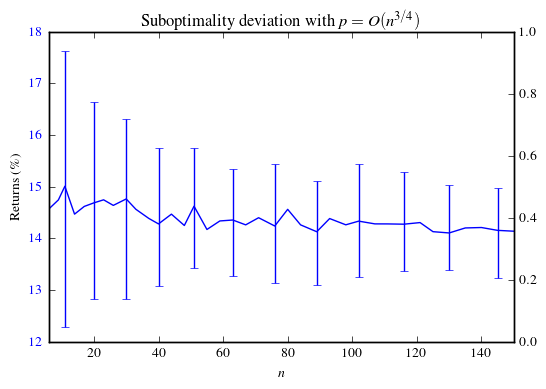

In [201]:
fig3_sub = plt.figure()
ax13_sub = fig3_sub.add_subplot(111)
ax23_sub = ax13_sub.twinx()

ax13_sub.errorbar(ns3,center_CE3sub,yerr=[top_CE3sub,bottom_CE3sub])
ax13_sub.axis(xmin=min(ns3),xmax=max(ns3))
ax13_sub.set_xlabel('$n$')
ax13_sub.set_ylabel('Returns (\%)');
# ax12_sub.axis(ymax=7)
for t in ax13_sub.get_yticklabels():
    t.set_color('b')


# ax23_sub.errorbar(ps3,center_bound3sub,yerr=[top_bound3sub,bottom_bound3sub],color='r')
# # ax23_sub.axis(xmin=min(ns3),ymin=0,ymax=150000)
# for t in ax23_sub.get_yticklabels():
#     t.set_color('r')

ax13_sub.set_title('Suboptimality deviation with $p=O(n^{3/4})$');

In [95]:
# True Market
p_true = 100
R_true = NormalDistribution(5,10)
X_true = [1/np.sqrt(2)*TDistribution(ν=4) for _ in range(p_true)]
M_true = synth.GaussianMarket(X_true,R_true)

# Discretized Market
X,R = M_true.sample(n_true)
M2 = synth.MarketDiscreteDistribution(X,R)

In [101]:
res = np.zeros(shape=(p_true,5))
for i,p in enumerate(range(p_true)):
    X,R = M2.sample(400)
    X = X[:,range(p+1)]
    norm = np.linalg.norm(X,axis=1)**2
    res[i,0] = np.min(norm)
    res[i,1] = np.percentile(norm,10)
    res[i,2] = np.median(norm)
    res[i,3] = np.percentile(norm,95)
    # res[i,4] = np.max(norm)
    res[i,4] = np.percentile(norm,99)
#res



# res = np.empty(shape=(p_true2,3))
# for i,p in enumerate(range(p_true2)):
#     X,R = M2.sample(50)
#     X = X[range(p),:]
#     res[i,0] = np.min(np.linalg.norm(X,axis=0)**2)
#     res[i,1] = np.median(np.linalg.norm(X,axis=0)**2)
#     res[i,2] = np.max(np.linalg.norm(X,axis=0)**2)

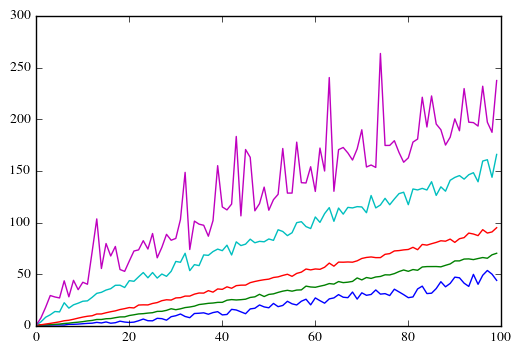

In [102]:
plt.plot(res)

In [154]:
res

array([[  1.47250785e-003,   2.84917716e-001,   4.08038056e+000],
       [  5.30172312e-002,   1.08119566e+000,   1.67509852e+001],
       [  1.92605567e-002,   1.60164791e+000,   8.99045720e+000],
       [  3.03006260e-001,   2.67560598e+000,   2.08020757e+001],
       [  4.23491901e-001,   3.00995724e+000,   2.11960522e+001],
       [  7.03450261e-001,   4.18717505e+000,   2.32710748e+001],
       [  1.09323423e+000,   5.77012322e+000,   5.45890529e+001],
       [  1.43591246e+000,   5.36849144e+000,   5.13346264e+001],
       [  1.38167022e+000,   7.00808287e+000,   4.81166274e+001],
       [  1.18785495e+000,   8.65182333e+000,   2.36872348e+001],
       [  1.91007031e+000,   8.66637804e+000,   1.85592497e+001],
       [  1.84131875e+000,   9.62100536e+000,   2.68375802e+001],
       [  2.32631566e+000,   9.65166319e+000,   5.60829867e+001],
       [  1.56866704e+000,   1.31494029e+001,   4.50503001e+001],
       [  3.00513091e+000,   1.10492387e+001,   3.67952565e+001],
       [  

In [0]:
## $p=O(n^{3/4})$

In [9]:
ps4 = sz
ns4 = 15*ps4
np.array([ps4,ns4]).T

array([[  4,  60],
       [  5,  75],
       [  6,  90],
       [  7, 105],
       [  8, 120],
       [  9, 135],
       [ 10, 150],
       [ 11, 165],
       [ 12, 180],
       [ 13, 195],
       [ 14, 210],
       [ 15, 225],
       [ 16, 240],
       [ 17, 255],
       [ 18, 270],
       [ 19, 285],
       [ 20, 300],
       [ 21, 315],
       [ 22, 330],
       [ 23, 345],
       [ 24, 360],
       [ 25, 375],
       [ 26, 390],
       [ 27, 405],
       [ 28, 420],
       [ 29, 435],
       [ 30, 450],
       [ 31, 465],
       [ 32, 480],
       [ 33, 495],
       [ 34, 510],
       [ 35, 525],
       [ 36, 540],
       [ 37, 555],
       [ 38, 570],
       [ 39, 585],
       [ 40, 600]])

In [16]:
n_experiments = 50

qs4 = np.zeros(shape=(len(ns4),p_true+1,n_experiments))
CEs_ins4 = np.empty(shape=(len(ns4),n_experiments))
CEs_oos4 = np.empty(shape=(len(ns4),n_experiments))

for i,(n,p) in enumerate(zip(ns4,ps4)):
    print('Sampling %d problems of size %d × %d' % (n_experiments,n,p+1))
    prs = pr.ProblemsDistribution(M,n,λ=0,u=u,Rf=0,problem_t=pr.MaskedProblem)
    prs.sample(n_experiments,{'fs':range(p+1)},par=True)
    qs4[i,:p+1,:] = prs.qs.T
    CEs_ins4[i,:] = prs.CEs_ins
    CEs_oos4[i,:] = prs.CEs_oos

Sampling 50 problems of size 600 × 41
Sampling 50 problems of size 585 × 40
Sampling 50 problems of size 570 × 39
Sampling 50 problems of size 555 × 38
Sampling 50 problems of size 540 × 37
Sampling 50 problems of size 525 × 36
Sampling 50 problems of size 510 × 35
Sampling 50 problems of size 495 × 34
Sampling 50 problems of size 480 × 33
Sampling 50 problems of size 465 × 32
Sampling 50 problems of size 450 × 31
Sampling 50 problems of size 435 × 30
Sampling 50 problems of size 420 × 29
Sampling 50 problems of size 405 × 28
Sampling 50 problems of size 390 × 27
Sampling 50 problems of size 375 × 26
Sampling 50 problems of size 360 × 25
Sampling 50 problems of size 345 × 24
Sampling 50 problems of size 330 × 23
Sampling 50 problems of size 315 × 22
Sampling 50 problems of size 300 × 21
Sampling 50 problems of size 285 × 20
Sampling 50 problems of size 270 × 19
Sampling 50 problems of size 255 × 18
Sampling 50 problems of size 240 × 17
Sampling 50 problems of size 225 × 16
Sampling 50 

In [17]:
error_CE4 = CEs_oos4-CEs_ins4
center_CE4 = np.median(error_CE4,axis=1)
bottom_CE4 = np.percentile(error_CE4,10,axis=1)-center_CE4
top_CE4 = -np.percentile(error_CE4,90,axis=1)+center_CE4

# error_bound4 = -(Ω/(D(u)(CEs_ins4)).T).T # double transpose is for broadcastigne
# center_bound4 = np.median(error_bound4,axis=1)
# bottom_bound4 = np.percentile(error_bound4,10,axis=1)-center_bound4
# top_bound4 = -np.percentile(error_bound4,90,axis=1)+center_bound4

for i in range(len(top_CE4)):
    if (i+1)%3 != 0:
        bottom_CE4[i] = np.nan
        top_CE4[i] = np.nan
        # bottom_bound4[i] = np.nan
        # top_bound4[i] = np.nan

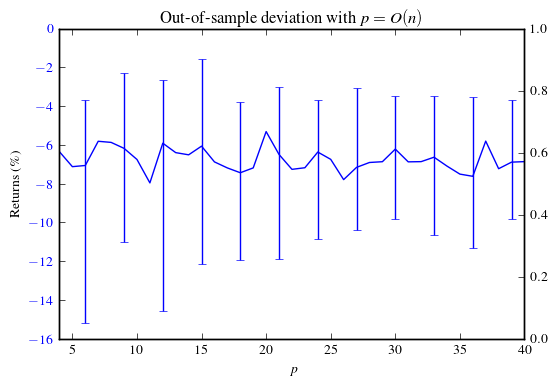

In [19]:
fig4_oos = plt.figure()
ax14_oos = fig4_oos.add_subplot(111)
ax24_oos = ax14_oos.twinx()

ax14_oos.errorbar(ps4,center_CE4,yerr=[top_CE4,bottom_CE4],color='b')
ax14_oos.axis(xmin=min(ps4),xmax=max(ps4))
ax14_oos.set_xlabel('$p$')
ax14_oos.set_ylabel('Returns (\%)');
for t in ax14_oos.get_yticklabels():
   t.set_color('b')

# ax24_oos.errorbar(ns4,center_bound4,yerr=[top_bound4,bottom_bound4],color='r')
# ax24_oos.axis(xmin=min(ns4),ymax=0,ymin=-1000000)
# for t in ax24_oos.get_yticklabels():
#     t.set_color('r')

ax14_oos.set_title('Out-of-sample deviation with $p=O(n)$');

In [22]:
error_CE4sub = CE_star_q_star - CEs_oos4
center_CE4sub = np.median(error_CE4sub,axis=1)
bottom_CE4sub = np.percentile(error_CE4sub,10,axis=1)-center_CE4sub
top_CE4sub = -np.percentile(error_CE4sub,90,axis=1)+center_CE4sub

# error_bound4sub = -(ω/(D(u)(CEs_oos4)).T).T
# center_bound4sub = np.median(error_bound4sub,axis=1)
# bottom_bound4sub = np.percentile(error_bound4sub,10,axis=1)-center_bound4sub
# top_bound4sub = -np.percentile(error_bound4sub,90,axis=1)+center_bound4sub

for i in range(len(top_CE4sub)):
    if (i+1)%3 != 0:
        bottom_CE4sub[i] = np.nan
        top_CE4sub[i] = np.nan
        # bottom_bound4sub[i] = np.nan
        # top_bound4sub[i] = np.nan

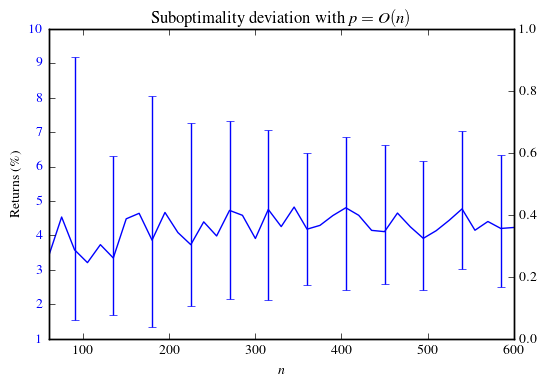

In [23]:
fig4_sub = plt.figure()
ax14_sub = fig4_sub.add_subplot(111)
ax24_sub = ax14_sub.twinx()

ax14_sub.errorbar(ns4,center_CE4sub,yerr=[top_CE4sub,bottom_CE4sub])
ax14_sub.axis(xmin=min(ns4),xmax=max(ns4))
ax14_sub.set_xlabel('$n$')
ax14_sub.set_ylabel('Returns (\%)');
# ax12_sub.axis(ymax=7)
for t in ax14_sub.get_yticklabels():
    t.set_color('b')


# ax24_sub.errorbar(ps4,center_bound4sub,yerr=[top_bound4sub,bottom_bound4sub],color='r')
# # ax24_sub.axis(xmin=min(ns4),ymin=0,ymax=150000)
# for t in ax24_sub.get_yticklabels():
#     t.set_color('r')

ax14_sub.set_title('Suboptimality deviation with $p=O(n)$');

In [0]:
## $p=O(n^{3/4})$

In [38]:
ps4 = sz
ns4 = 2*ps4
np.array([ps4,ns4]).T

array([[ 4,  8],
       [ 5, 10],
       [ 6, 12],
       [ 7, 14],
       [ 8, 16],
       [ 9, 18],
       [10, 20],
       [11, 22],
       [12, 24],
       [13, 26],
       [14, 28],
       [15, 30],
       [16, 32],
       [17, 34],
       [18, 36],
       [19, 38],
       [20, 40],
       [21, 42],
       [22, 44],
       [23, 46],
       [24, 48],
       [25, 50],
       [26, 52],
       [27, 54],
       [28, 56],
       [29, 58],
       [30, 60],
       [31, 62],
       [32, 64],
       [33, 66],
       [34, 68],
       [35, 70],
       [36, 72],
       [37, 74],
       [38, 76],
       [39, 78],
       [40, 80]])

In [39]:
n_experiments = 50

qs4 = np.zeros(shape=(len(ns4),p_true+1,n_experiments))
CEs_ins4 = np.empty(shape=(len(ns4),n_experiments))
CEs_oos4 = np.empty(shape=(len(ns4),n_experiments))

for i,(n,p) in enumerate(zip(ns4,ps4)):
    print('Sampling %d problems of size %d × %d' % (n_experiments,n,p+1))
    prs = pr.ProblemsDistribution(M,n,λ=1,u=u,Rf=0,problem_t=pr.MaskedProblem)
    prs.sample(n_experiments,{'fs':range(p+1)},par=True)
    qs4[i,:p+1,:] = prs.qs.T
    CEs_ins4[i,:] = prs.CEs_ins
    CEs_oos4[i,:] = prs.CEs_oos

Sampling 50 problems of size 80 × 41
Sampling 50 problems of size 78 × 40
Sampling 50 problems of size 76 × 39
Sampling 50 problems of size 74 × 38
Sampling 50 problems of size 72 × 37
Sampling 50 problems of size 70 × 36
Sampling 50 problems of size 68 × 35
Sampling 50 problems of size 66 × 34
Sampling 50 problems of size 64 × 33
Sampling 50 problems of size 62 × 32
Sampling 50 problems of size 60 × 31
Sampling 50 problems of size 58 × 30
Sampling 50 problems of size 56 × 29
Sampling 50 problems of size 54 × 28
Sampling 50 problems of size 52 × 27
Sampling 50 problems of size 50 × 26
Sampling 50 problems of size 48 × 25
Sampling 50 problems of size 46 × 24
Sampling 50 problems of size 44 × 23
Sampling 50 problems of size 42 × 22
Sampling 50 problems of size 40 × 21
Sampling 50 problems of size 38 × 20
Sampling 50 problems of size 36 × 19
Sampling 50 problems of size 34 × 18
Sampling 50 problems of size 32 × 17
Sampling 50 problems of size 30 × 16
Sampling 50 problems of size 28 × 15
S

In [40]:

error_CE4 = CEs_oos4-CEs_ins4
center_CE4 = np.median(error_CE4,axis=1)
bottom_CE4 = np.percentile(error_CE4,10,axis=1)-center_CE4
top_CE4 = -np.percentile(error_CE4,90,axis=1)+center_CE4

# error_bound4 = -(Ω/(D(u)(CEs_ins4)).T).T # double transpose is for broadcastigne
# center_bound4 = np.median(error_bound4,axis=1)
# bottom_bound4 = np.percentile(error_bound4,10,axis=1)-center_bound4
# top_bound4 = -np.percentile(error_bound4,90,axis=1)+center_bound4

for i in range(len(top_CE4)):
    if (i+1)%3 != 0:
        bottom_CE4[i] = np.nan
        top_CE4[i] = np.nan
        # bottom_bound4[i] = np.nan
        # top_bound4[i] = np.nan

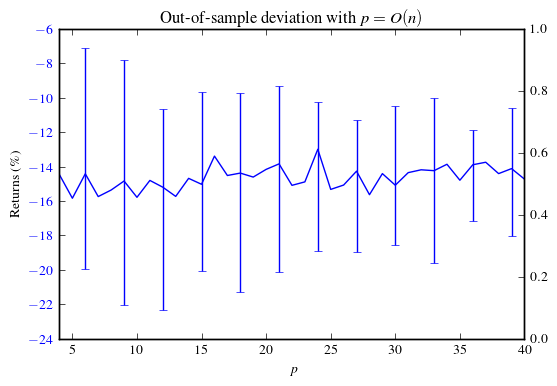

In [41]:
fig4_oos = plt.figure()
ax14_oos = fig4_oos.add_subplot(111)
ax24_oos = ax14_oos.twinx()

ax14_oos.errorbar(ps4,center_CE4,yerr=[top_CE4,bottom_CE4],color='b')
ax14_oos.axis(xmin=min(ps4),xmax=max(ps4))
ax14_oos.set_xlabel('$p$')
ax14_oos.set_ylabel('Returns (\%)');
for t in ax14_oos.get_yticklabels():
   t.set_color('b')

# ax24_oos.errorbar(ns4,center_bound4,yerr=[top_bound4,bottom_bound4],color='r')
# ax24_oos.axis(xmin=min(ns4),ymax=0,ymin=-1000000)
# for t in ax24_oos.get_yticklabels():
#     t.set_color('r')

ax14_oos.set_title('Out-of-sample deviation with $p=O(n)$');

In [36]:
error_CE4sub = CE_star_q_star - CEs_oos4
center_CE4sub = np.median(error_CE4sub,axis=1)
bottom_CE4sub = np.percentile(error_CE4sub,10,axis=1)-center_CE4sub
top_CE4sub = -np.percentile(error_CE4sub,90,axis=1)+center_CE4sub

# error_bound4sub = -(ω/(D(u)(CEs_oos4)).T).T
# center_bound4sub = np.median(error_bound4sub,axis=1)
# bottom_bound4sub = np.percentile(error_bound4sub,10,axis=1)-center_bound4sub
# top_bound4sub = -np.percentile(error_bound4sub,90,axis=1)+center_bound4sub

for i in range(len(top_CE4sub)):
    if (i+1)%3 != 0:
        bottom_CE4sub[i] = np.nan
        top_CE4sub[i] = np.nan
        # bottom_bound4sub[i] = np.nan
        # top_bound4sub[i] = np.nan

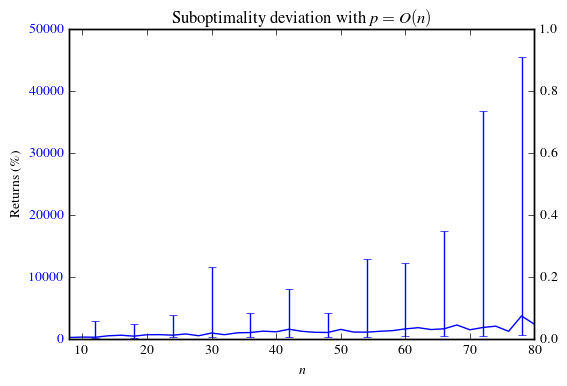

In [37]:
fig4_sub = plt.figure()
ax14_sub = fig4_sub.add_subplot(111)
ax24_sub = ax14_sub.twinx()

ax14_sub.errorbar(ns4,center_CE4sub,yerr=[top_CE4sub,bottom_CE4sub])
ax14_sub.axis(xmin=min(ns4),xmax=max(ns4))
ax14_sub.set_xlabel('$n$')
ax14_sub.set_ylabel('Returns (\%)');
# ax12_sub.axis(ymax=7)
for t in ax14_sub.get_yticklabels():
    t.set_color('b')


# ax24_sub.errorbar(ps4,center_bound4sub,yerr=[top_bound4sub,bottom_bound4sub],color='r')
# # ax24_sub.axis(xmin=min(ns4),ymin=0,ymax=150000)
# for t in ax24_sub.get_yticklabels():
#     t.set_color('r')

ax14_sub.set_title('Suboptimality deviation with $p=O(n)$');

In [0]:
## λ=0, p = 4

In [43]:
ps4 = np.ones_like(sz)*4
ns4 = sz*2
np.array([ps4,ns4]).T

array([[ 4,  8],
       [ 4, 10],
       [ 4, 12],
       [ 4, 14],
       [ 4, 16],
       [ 4, 18],
       [ 4, 20],
       [ 4, 22],
       [ 4, 24],
       [ 4, 26],
       [ 4, 28],
       [ 4, 30],
       [ 4, 32],
       [ 4, 34],
       [ 4, 36],
       [ 4, 38],
       [ 4, 40],
       [ 4, 42],
       [ 4, 44],
       [ 4, 46],
       [ 4, 48],
       [ 4, 50],
       [ 4, 52],
       [ 4, 54],
       [ 4, 56],
       [ 4, 58],
       [ 4, 60],
       [ 4, 62],
       [ 4, 64],
       [ 4, 66],
       [ 4, 68],
       [ 4, 70],
       [ 4, 72],
       [ 4, 74],
       [ 4, 76],
       [ 4, 78],
       [ 4, 80]])

In [51]:
n_experiments = 50

qs4 = np.zeros(shape=(len(ns4),p_true+1,n_experiments))
CEs_ins4 = np.empty(shape=(len(ns4),n_experiments))
CEs_oos4 = np.empty(shape=(len(ns4),n_experiments))

for i,(n,p) in enumerate(zip(ns4,ps4)):
    print('Sampling %d problems of size %d × %d' % (n_experiments,n,p+1))
    prs = pr.ProblemsDistribution(M,n,λ=0,u=u,Rf=0,problem_t=pr.MaskedProblem)
    prs.sample(n_experiments,{'fs':range(p+1)},par=True)
    qs4[i,:p+1,:] = prs.qs.T
    CEs_ins4[i,:] = prs.CEs_ins
    CEs_oos4[i,:] = prs.CEs_oos

Sampling 50 problems of size 80 × 5
Sampling 50 problems of size 78 × 5
Sampling 50 problems of size 76 × 5
Sampling 50 problems of size 74 × 5
Sampling 50 problems of size 72 × 5
Sampling 50 problems of size 70 × 5
Sampling 50 problems of size 68 × 5
Sampling 50 problems of size 66 × 5
Sampling 50 problems of size 64 × 5
Sampling 50 problems of size 62 × 5
Sampling 50 problems of size 60 × 5
Sampling 50 problems of size 58 × 5
Sampling 50 problems of size 56 × 5
Sampling 50 problems of size 54 × 5
Sampling 50 problems of size 52 × 5
Sampling 50 problems of size 50 × 5
Sampling 50 problems of size 48 × 5
Sampling 50 problems of size 46 × 5
Sampling 50 problems of size 44 × 5
Sampling 50 problems of size 42 × 5
Sampling 50 problems of size 40 × 5
Sampling 50 problems of size 38 × 5
Sampling 50 problems of size 36 × 5
Sampling 50 problems of size 34 × 5
Sampling 50 problems of size 32 × 5
Sampling 50 problems of size 30 × 5
Sampling 50 problems of size 28 × 5
Sampling 50 problems of size

In [52]:

error_CE4 = CEs_oos4-CEs_ins4
center_CE4 = np.median(error_CE4,axis=1)
bottom_CE4 = np.percentile(error_CE4,10,axis=1)-center_CE4
top_CE4 = -np.percentile(error_CE4,90,axis=1)+center_CE4

# error_bound4 = -(Ω/(D(u)(CEs_ins4)).T).T # double transpose is for broadcastigne
# center_bound4 = np.median(error_bound4,axis=1)
# bottom_bound4 = np.percentile(error_bound4,10,axis=1)-center_bound4
# top_bound4 = -np.percentile(error_bound4,90,axis=1)+center_bound4

for i in range(len(top_CE4)):
    if (i+1)%3 != 0:
        bottom_CE4[i] = np.nan
        top_CE4[i] = np.nan
        # bottom_bound4[i] = np.nan
        # top_bound4[i] = np.nan

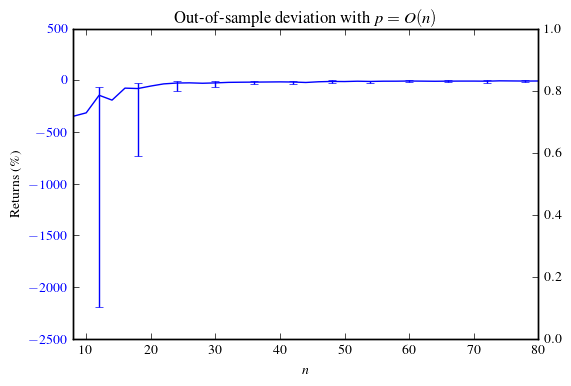

In [53]:
fig4_oos = plt.figure()
ax14_oos = fig4_oos.add_subplot(111)
ax24_oos = ax14_oos.twinx()

ax14_oos.errorbar(ns4,center_CE4,yerr=[top_CE4,bottom_CE4],color='b')
ax14_oos.axis(xmin=min(ns4),xmax=max(ns4))
ax14_oos.set_xlabel('$n$')
ax14_oos.set_ylabel('Returns (\%)');
for t in ax14_oos.get_yticklabels():
   t.set_color('b')

# ax24_oos.errorbar(ns4,center_bound4,yerr=[top_bound4,bottom_bound4],color='r')
# ax24_oos.axis(xmin=min(ns4),ymax=0,ymin=-1000000)
# for t in ax24_oos.get_yticklabels():
#     t.set_color('r')

ax14_oos.set_title('Out-of-sample deviation with $p=O(n)$');

In [0]:
## λ = 0, p = \sqrt{2n}

In [165]:
p_true = 40

In [246]:
ps4 = sz
ns4 = np.floor(0.5*ps4**2)
np.array([ps4,ns4]).T

array([[   4.,    8.],
       [   5.,   12.],
       [   6.,   18.],
       [   7.,   24.],
       [   8.,   32.],
       [   9.,   40.],
       [  10.,   50.],
       [  11.,   60.],
       [  12.,   72.],
       [  13.,   84.],
       [  14.,   98.],
       [  15.,  112.],
       [  16.,  128.],
       [  17.,  144.],
       [  18.,  162.],
       [  19.,  180.],
       [  20.,  200.],
       [  21.,  220.],
       [  22.,  242.],
       [  23.,  264.],
       [  24.,  288.],
       [  25.,  312.],
       [  26.,  338.],
       [  27.,  364.],
       [  28.,  392.],
       [  29.,  420.],
       [  30.,  450.],
       [  31.,  480.],
       [  32.,  512.],
       [  33.,  544.],
       [  34.,  578.],
       [  35.,  612.],
       [  36.,  648.],
       [  37.,  684.],
       [  38.,  722.],
       [  39.,  760.],
       [  40.,  800.]])

In [247]:
n_experiments = 50

qs4 = np.zeros(shape=(len(ns4),p_true+1,n_experiments))
CEs_ins4 = np.empty(shape=(len(ns4),n_experiments))
CEs_oos4 = np.empty(shape=(len(ns4),n_experiments))

for i,(n,p) in enumerate(zip(ns4,ps4)):
    print('Sampling %d problems of size %d × %d' % (n_experiments,n,p+1))
    prs = pr.ProblemsDistribution(M,n,λ=0,u=u,Rf=0,problem_t=pr.MaskedProblem)
    prs.sample(n_experiments,{'fs':range(p+1)},par=True)
    qs4[i,:p+1,:] = prs.qs.T
    CEs_ins4[i,:] = prs.CEs_ins
    CEs_oos4[i,:] = prs.CEs_oos

PicklingError: Can't pickle <class 'model.distrs.DiscreteDistribution'>: it's not the same object as model.distrs.DiscreteDistribution

Sampling 50 problems of size 8 × 5


In [199]:
error_CE4 = CEs_oos4-CEs_ins4
center_CE4 = np.median(error_CE4,axis=1)
bottom_CE4 = np.percentile(error_CE4,10,axis=1)-center_CE4
top_CE4 = -np.percentile(error_CE4,90,axis=1)+center_CE4

# error_bound4 = -(Ω/(D(u)(CEs_ins4)).T).T # double transpose is for broadcastigne
# center_bound4 = np.median(error_bound4,axis=1)
# bottom_bound4 = np.percentile(error_bound4,10,axis=1)-center_bound4
# top_bound4 = -np.percentile(error_bound4,90,axis=1)+center_bound4

for i in range(len(top_CE4)):
    if (i+1)%3 != 0:
        bottom_CE4[i] = np.nan
        top_CE4[i] = np.nan
        # bottom_bound4[i] = np.nan
        # top_bound4[i] = np.nan

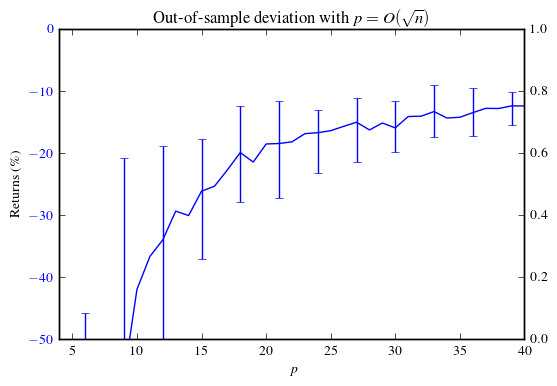

In [200]:
fig4_oos = plt.figure()
ax14_oos = fig4_oos.add_subplot(111)
ax24_oos = ax14_oos.twinx()

ax14_oos.errorbar(ps4,center_CE4,yerr=[top_CE4,bottom_CE4],color='b')
ax14_oos.axis(xmin=min(ps4),xmax=max(ps4),ymin=-50)
ax14_oos.set_xlabel('$p$')
ax14_oos.set_ylabel('Returns (\%)');
for t in ax14_oos.get_yticklabels():
   t.set_color('b')

# ax24_oos.errorbar(ns4,center_bound4,yerr=[top_bound4,bottom_bound4],color='r')
# ax24_oos.axis(xmin=min(ns4),ymax=0,ymin=-1000000)
# for t in ax24_oos.get_yticklabels():
#     t.set_color('r')

ax14_oos.set_title('Out-of-sample deviation with $p=O(\sqrt{n})$');

In [0]:
## $λ = 0, n = 2p$

In [7]:
ps4 = sz
ns4 = 2*ps4
np.array([ps4,ns4]).T

array([[ 4,  8],
       [ 5, 10],
       [ 6, 12],
       [ 7, 14],
       [ 8, 16],
       [ 9, 18],
       [10, 20],
       [11, 22],
       [12, 24],
       [13, 26],
       [14, 28],
       [15, 30],
       [16, 32],
       [17, 34],
       [18, 36],
       [19, 38],
       [20, 40],
       [21, 42],
       [22, 44],
       [23, 46],
       [24, 48],
       [25, 50],
       [26, 52],
       [27, 54],
       [28, 56],
       [29, 58],
       [30, 60],
       [31, 62],
       [32, 64],
       [33, 66],
       [34, 68],
       [35, 70],
       [36, 72],
       [37, 74],
       [38, 76],
       [39, 78],
       [40, 80]])

In [8]:
n_experiments = 150

qs4 = np.zeros(shape=(len(ns4),p_true+1,n_experiments))
CEs_ins4 = np.empty(shape=(len(ns4),n_experiments))
CEs_oos4 = np.empty(shape=(len(ns4),n_experiments))

for i,(n,p) in enumerate(zip(ns4,ps4)):
    print('Sampling %d problems of size %d × %d' % (n_experiments,n,p+1))
    prs = pr.ProblemsDistribution(M,n,λ=0,u=u,Rf=0,problem_t=pr.MaskedProblem)
    prs.solver = cvx.CVXOPT
    prs.sample(n_experiments,{'fs':range(p+1)},par=True)
    qs4[i,:p+1,:] = prs.qs.T
    CEs_ins4[i,:] = prs.CEs_ins
    CEs_oos4[i,:] = prs.CEs_oos

Sampling 150 problems of size 80 × 41
Sampling 150 problems of size 78 × 40
Sampling 150 problems of size 76 × 39
Sampling 150 problems of size 74 × 38
Sampling 150 problems of size 72 × 37
Sampling 150 problems of size 70 × 36
Sampling 150 problems of size 68 × 35
Sampling 150 problems of size 66 × 34
Sampling 150 problems of size 64 × 33
Sampling 150 problems of size 62 × 32
Sampling 150 problems of size 60 × 31
Sampling 150 problems of size 58 × 30
Sampling 150 problems of size 56 × 29
Sampling 150 problems of size 54 × 28
Sampling 150 problems of size 52 × 27
Sampling 150 problems of size 50 × 26
Sampling 150 problems of size 48 × 25
Sampling 150 problems of size 46 × 24
Sampling 150 problems of size 44 × 23
Sampling 150 problems of size 42 × 22
Sampling 150 problems of size 40 × 21
Sampling 150 problems of size 38 × 20
Sampling 150 problems of size 36 × 19
Sampling 150 problems of size 34 × 18
Sampling 150 problems of size 32 × 17
Sampling 150 problems of size 30 × 16
Sampling 150

In [9]:
error_CE4 = CEs_oos4-CEs_ins4
center_CE4 = np.median(error_CE4,axis=1)
bottom_CE4 = np.percentile(error_CE4,10,axis=1)-center_CE4
top_CE4 = -np.percentile(error_CE4,90,axis=1)+center_CE4

# error_bound4 = -(Ω/(D(u)(CEs_ins4)).T).T # double transpose is for broadcastigne
# center_bound4 = np.median(error_bound4,axis=1)
# bottom_bound4 = np.percentile(error_bound4,10,axis=1)-center_bound4
# top_bound4 = -np.percentile(error_bound4,90,axis=1)+center_bound4

for i in range(len(top_CE4)):
    if (i+1)%3 != 0:
        bottom_CE4[i] = np.nan
        top_CE4[i] = np.nan
        # bottom_bound4[i] = np.nan
        # top_bound4[i] = np.nan

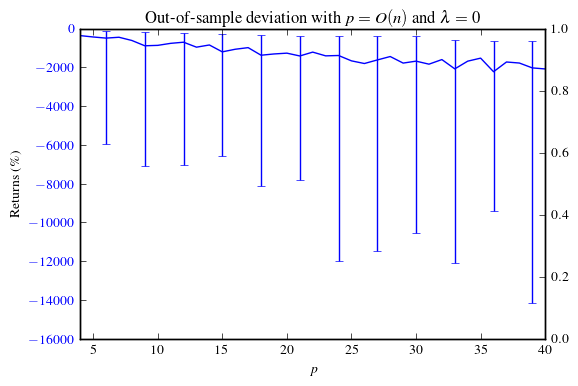

In [19]:
fig4_oos = plt.figure()
ax14_oos = fig4_oos.add_subplot(111)
ax24_oos = ax14_oos.twinx()

ax14_oos.errorbar(ps4,center_CE4,yerr=[top_CE4,bottom_CE4],color='b')
ax14_oos.axis(xmin=min(ps4))
ax14_oos.set_xlabel('$p$')
ax14_oos.set_ylabel('Returns (\%)');
for t in ax14_oos.get_yticklabels():
   t.set_color('b')

# ax24_oos.errorbar(ns4,center_bound4,yerr=[top_bound4,bottom_bound4],color='r')
# ax24_oos.axis(xmin=min(ns4),ymax=0,ymin=-1000000)
# for t in ax24_oos.get_yticklabels():
#     t.set_color('r')

ax14_oos.set_title('Out-of-sample deviation with $p=O(n)$ and $\lambda = 0$');

In [20]:
fig4_oos.savefig('o(n)-λ=0-oos.pdf')

In [16]:
error_CE4sub = CE_star_q_star - CEs_oos4
center_CE4sub = np.median(error_CE4sub,axis=1)
bottom_CE4sub = np.percentile(error_CE4sub,10,axis=1)-center_CE4sub
top_CE4sub = -np.percentile(error_CE4sub,90,axis=1)+center_CE4sub

# error_bound4sub = -(ω/(D(u)(CEs_oos4)).T).T
# center_bound4sub = np.median(error_bound4sub,axis=1)
# bottom_bound4sub = np.percentile(error_bound4sub,10,axis=1)-center_bound4sub
# top_bound4sub = -np.percentile(error_bound4sub,90,axis=1)+center_bound4sub

for i in range(len(top_CE4sub)):
    if (i+1)%3 != 0:
        bottom_CE4sub[i] = np.nan
        top_CE4sub[i] = np.nan
        # bottom_bound4sub[i] = np.nan
        # top_bound4sub[i] = np.nan

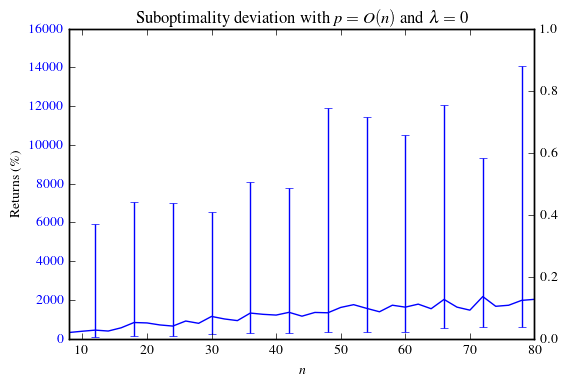

In [18]:
fig4_sub = plt.figure()
ax14_sub = fig4_sub.add_subplot(111)
ax24_sub = ax14_sub.twinx()

ax14_sub.errorbar(ns4,center_CE4sub,yerr=[top_CE4sub,bottom_CE4sub])
ax14_sub.axis(xmin=min(ns4),xmax=max(ns4))
ax14_sub.set_xlabel('$n$')
ax14_sub.set_ylabel('Returns (\%)');
# ax12_sub.axis(ymax=7)
for t in ax14_sub.get_yticklabels():
    t.set_color('b')


# ax24_sub.errorbar(ps4,center_bound4sub,yerr=[top_bound4sub,bottom_bound4sub],color='r')
# # ax24_sub.axis(xmin=min(ns4),ymin=0,ymax=150000)
# for t in ax24_sub.get_yticklabels():
#     t.set_color('r')

ax14_sub.set_title('Suboptimality deviation with $p=O(n)$ and $\lambda = 0$');

In [21]:
## $λ \neq 0, n = 2p$

In [21]:
ps4 = sz
ps4 = np.array([el for el in list(ps4) if el%2 == 0])
ns4 = 2*ps4
λ = 1e-4
np.array([ps4,ns4]).T

array([[  4,   8],
       [  6,  12],
       [  8,  16],
       [ 10,  20],
       [ 12,  24],
       [ 14,  28],
       [ 16,  32],
       [ 18,  36],
       [ 20,  40],
       [ 22,  44],
       [ 24,  48],
       [ 26,  52],
       [ 28,  56],
       [ 30,  60],
       [ 32,  64],
       [ 34,  68],
       [ 36,  72],
       [ 38,  76],
       [ 40,  80],
       [ 42,  84],
       [ 44,  88],
       [ 46,  92],
       [ 48,  96],
       [ 50, 100],
       [ 52, 104],
       [ 54, 108],
       [ 56, 112],
       [ 58, 116],
       [ 60, 120],
       [ 62, 124],
       [ 64, 128],
       [ 66, 132],
       [ 68, 136],
       [ 70, 140],
       [ 72, 144],
       [ 74, 148],
       [ 76, 152],
       [ 78, 156],
       [ 80, 160]])

In [22]:
n_experiments = 50

qs4 = np.zeros(shape=(len(ns4),p_true+1,n_experiments))
CEs_ins4 = np.empty(shape=(len(ns4),n_experiments))
CEs_oos4 = np.empty(shape=(len(ns4),n_experiments))

for i,(n,p) in enumerate(zip(ns4,ps4)):
    print('Sampling %d problems of size %d × %d' % (n_experiments,n,p+1))
    prs = pr.ProblemsDistribution(M,n,λ=λ,u=u,Rf=0,problem_t=pr.MaskedProblem)
    prs.solver = cvx.SCS
    prs.sample(n_experiments,{'fs':range(p+1)},par=True)
    qs4[i,:p+1,:] = prs.qs.T
    CEs_ins4[i,:] = prs.CEs_ins
    CEs_oos4[i,:] = prs.CEs_oos

Sampling 50 problems of size 160 × 81
Sampling 50 problems of size 156 × 79
Sampling 50 problems of size 152 × 77
Sampling 50 problems of size 148 × 75
Sampling 50 problems of size 144 × 73
Sampling 50 problems of size 140 × 71
Sampling 50 problems of size 136 × 69
Sampling 50 problems of size 132 × 67
Sampling 50 problems of size 128 × 65
Sampling 50 problems of size 124 × 63
Sampling 50 problems of size 120 × 61
Sampling 50 problems of size 116 × 59
Sampling 50 problems of size 112 × 57
Sampling 50 problems of size 108 × 55
Sampling 50 problems of size 104 × 53
Sampling 50 problems of size 100 × 51
Sampling 50 problems of size 96 × 49
Sampling 50 problems of size 92 × 47
Sampling 50 problems of size 88 × 45
Sampling 50 problems of size 84 × 43
Sampling 50 problems of size 80 × 41
Sampling 50 problems of size 76 × 39
Sampling 50 problems of size 72 × 37
Sampling 50 problems of size 68 × 35
Sampling 50 problems of size 64 × 33
Sampling 50 problems of size 60 × 31
Sampling 50 problems o

In [23]:
error_CE4 = CEs_oos4-CEs_ins4
center_CE4 = np.median(error_CE4,axis=1)
bottom_CE4 = np.percentile(error_CE4,10,axis=1)-center_CE4
top_CE4 = -np.percentile(error_CE4,90,axis=1)+center_CE4

# error_bound4 = -(Ω/(D(u)(CEs_ins4)).T).T # double transpose is for broadcastigne
# center_bound4 = np.median(error_bound4,axis=1)
# bottom_bound4 = np.percentile(error_bound4,10,axis=1)-center_bound4
# top_bound4 = -np.percentile(error_bound4,90,axis=1)+center_bound4

for i in range(len(top_CE4)):
    if (i+1)%3 != 0:
        bottom_CE4[i] = np.nan
        top_CE4[i] = np.nan
        # bottom_bound4[i] = np.nan
        # top_bound4[i] = np.nan

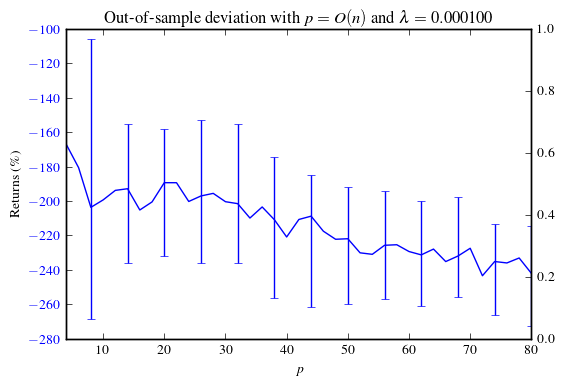

In [24]:
fig4_oos = plt.figure()
ax14_oos = fig4_oos.add_subplot(111)
ax24_oos = ax14_oos.twinx()

ax14_oos.errorbar(ps4,center_CE4,yerr=[top_CE4,bottom_CE4],color='b')
ax14_oos.axis(xmin=min(ps4))
ax14_oos.set_xlabel('$p$')
ax14_oos.set_ylabel('Returns (\%)');
for t in ax14_oos.get_yticklabels():
   t.set_color('b')

# ax24_oos.errorbar(ns4,center_bound4,yerr=[top_bound4,bottom_bound4],color='r')
# ax24_oos.axis(xmin=min(ns4),ymax=0,ymin=-1000000)
# for t in ax24_oos.get_yticklabels():
#     t.set_color('r')

ax14_oos.set_title('Out-of-sample deviation with $p=O(n)$ and $\lambda = 10^{-4}$');

In [20]:
fig4_oos.savefig('Deviation-pO(n)-λ=1e-3.pdf')

In [0]:
## $λ \neq 0, p = O(n^{3/2})$

In [34]:
ps4 = sz
ns4 = np.floor(3.5*ps4**(2/3))
np.array([ps4,ns4]).T

array([[  4.,   8.],
       [  5.,  10.],
       [  6.,  11.],
       [  7.,  12.],
       [  8.,  13.],
       [  9.,  15.],
       [ 10.,  16.],
       [ 11.,  17.],
       [ 12.,  18.],
       [ 13.,  19.],
       [ 14.,  20.],
       [ 15.,  21.],
       [ 16.,  22.],
       [ 17.,  23.],
       [ 18.,  24.],
       [ 19.,  24.],
       [ 20.,  25.],
       [ 21.,  26.],
       [ 22.,  27.],
       [ 23.,  28.],
       [ 24.,  29.],
       [ 25.,  29.],
       [ 26.,  30.],
       [ 27.,  31.],
       [ 28.,  32.],
       [ 29.,  33.],
       [ 30.,  33.],
       [ 31.,  34.],
       [ 32.,  35.],
       [ 33.,  36.],
       [ 34.,  36.],
       [ 35.,  37.],
       [ 36.,  38.],
       [ 37.,  38.],
       [ 38.,  39.],
       [ 39.,  40.],
       [ 40.,  40.]])

In [35]:
n_experiments = 50

qs4 = np.zeros(shape=(len(ns4),p_true+1,n_experiments))
CEs_ins4 = np.empty(shape=(len(ns4),n_experiments))
CEs_oos4 = np.empty(shape=(len(ns4),n_experiments))

for i,(n,p) in enumerate(zip(ns4,ps4)):
    print('Sampling %d problems of size %d × %d' % (n_experiments,n,p+1))
    prs = pr.ProblemsDistribution(M,n,λ=0.5,u=u,Rf=0,problem_t=pr.MaskedProblem)
    prs.solver = None
    prs.sample(n_experiments,{'fs':range(p+1)},par=True)
    qs4[i,:p+1,:] = prs.qs.T
    CEs_ins4[i,:] = prs.CEs_ins
    CEs_oos4[i,:] = prs.CEs_oos

Sampling 50 problems of size 40 × 41
Sampling 50 problems of size 40 × 40
Sampling 50 problems of size 39 × 39
Sampling 50 problems of size 38 × 38
Sampling 50 problems of size 38 × 37
Sampling 50 problems of size 37 × 36
Sampling 50 problems of size 36 × 35
Sampling 50 problems of size 36 × 34
Sampling 50 problems of size 35 × 33
Sampling 50 problems of size 34 × 32
Sampling 50 problems of size 33 × 31
Sampling 50 problems of size 33 × 30
Sampling 50 problems of size 32 × 29
Sampling 50 problems of size 31 × 28
Sampling 50 problems of size 30 × 27
Sampling 50 problems of size 29 × 26
Sampling 50 problems of size 29 × 25
Sampling 50 problems of size 28 × 24
Sampling 50 problems of size 27 × 23
Sampling 50 problems of size 26 × 22
Sampling 50 problems of size 25 × 21
Sampling 50 problems of size 24 × 20
Sampling 50 problems of size 24 × 19
Sampling 50 problems of size 23 × 18
Sampling 50 problems of size 22 × 17
Sampling 50 problems of size 21 × 16
Sampling 50 problems of size 20 × 15
S

In [36]:
error_CE4 = CEs_oos4-CEs_ins4
center_CE4 = np.median(error_CE4,axis=1)
bottom_CE4 = np.percentile(error_CE4,10,axis=1)-center_CE4
top_CE4 = -np.percentile(error_CE4,90,axis=1)+center_CE4

# error_bound4 = -(Ω/(D(u)(CEs_ins4)).T).T # double transpose is for broadcastigne
# center_bound4 = np.median(error_bound4,axis=1)
# bottom_bound4 = np.percentile(error_bound4,10,axis=1)-center_bound4
# top_bound4 = -np.percentile(error_bound4,90,axis=1)+center_bound4

for i in range(len(top_CE4)):
    if (i+1)%3 != 0:
        bottom_CE4[i] = np.nan
        top_CE4[i] = np.nan
        # bottom_bound4[i] = np.nan
        # top_bound4[i] = np.nan

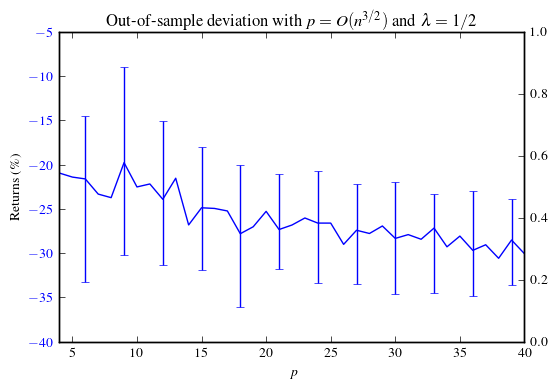

In [38]:
fig4_oos = plt.figure()
ax14_oos = fig4_oos.add_subplot(111)
ax24_oos = ax14_oos.twinx()

ax14_oos.errorbar(ps4,center_CE4,yerr=[top_CE4,bottom_CE4],color='b')
ax14_oos.axis(xmin=min(ps4))
ax14_oos.set_xlabel('$p$')
ax14_oos.set_ylabel('Returns (\%)');
for t in ax14_oos.get_yticklabels():
   t.set_color('b')

# ax24_oos.errorbar(ns4,center_bound4,yerr=[top_bound4,bottom_bound4],color='r')
# ax24_oos.axis(xmin=min(ns4),ymax=0,ymin=-1000000)
# for t in ax24_oos.get_yticklabels():
#     t.set_color('r')

ax14_oos.set_title('Out-of-sample deviation with $p=O(n^{3/2})$ and $\lambda = 1/2$');

In [201]:
λ = 0
ps4 = sz
ns4 = np.floor(1.4*ps4**(4/3))
np.array([ps4,ns4]).T

array([[   4.,    8.],
       [   5.,   11.],
       [   6.,   15.],
       [   7.,   18.],
       [   8.,   22.],
       [   9.,   26.],
       [  10.,   30.],
       [  11.,   34.],
       [  12.,   38.],
       [  13.,   42.],
       [  14.,   47.],
       [  15.,   51.],
       [  16.,   56.],
       [  17.,   61.],
       [  18.,   66.],
       [  19.,   70.],
       [  20.,   76.],
       [  21.,   81.],
       [  22.,   86.],
       [  23.,   91.],
       [  24.,   96.],
       [  25.,  102.],
       [  26.,  107.],
       [  27.,  113.],
       [  28.,  119.],
       [  29.,  124.],
       [  30.,  130.],
       [  31.,  136.],
       [  32.,  142.],
       [  33.,  148.],
       [  34.,  154.],
       [  35.,  160.],
       [  36.,  166.],
       [  37.,  172.],
       [  38.,  178.],
       [  39.,  185.],
       [  40.,  191.]])

In [202]:
n_experiments = 50

qs4 = np.zeros(shape=(len(ns4),p_true+1,n_experiments))
CEs_ins4 = np.empty(shape=(len(ns4),n_experiments))
CEs_oos4 = np.empty(shape=(len(ns4),n_experiments))

for i,(n,p) in enumerate(zip(ns4,ps4)):
    print('Sampling %d problems of size %d × %d' % (n_experiments,n,p+1))
    prs = pr.ProblemsDistribution(M,n,λ=λ,u=u,Rf=0,problem_t=pr.MaskedProblem)
    prs.solver = cvx.SCS
    prs.sample(n_experiments,{'fs':range(p+1)},par=True)
    qs4[i,:p+1,:] = prs.qs.T
    CEs_ins4[i,:] = prs.CEs_ins
    CEs_oos4[i,:] = prs.CEs_oos

Sampling 50 problems of size 191 × 41
Sampling 50 problems of size 185 × 40
Sampling 50 problems of size 178 × 39
Sampling 50 problems of size 172 × 38
Sampling 50 problems of size 166 × 37
Sampling 50 problems of size 160 × 36
Sampling 50 problems of size 154 × 35
Sampling 50 problems of size 148 × 34
Sampling 50 problems of size 142 × 33
Sampling 50 problems of size 136 × 32
Sampling 50 problems of size 130 × 31
Sampling 50 problems of size 124 × 30
Sampling 50 problems of size 119 × 29
Sampling 50 problems of size 113 × 28
Sampling 50 problems of size 107 × 27
Sampling 50 problems of size 102 × 26
Sampling 50 problems of size 96 × 25
Sampling 50 problems of size 91 × 24
Sampling 50 problems of size 86 × 23
Sampling 50 problems of size 81 × 22
Sampling 50 problems of size 76 × 21
Sampling 50 problems of size 70 × 20
Sampling 50 problems of size 66 × 19
Sampling 50 problems of size 61 × 18
Sampling 50 problems of size 56 × 17
Sampling 50 problems of size 51 × 16
Sampling 50 problems o

In [203]:
error_CE4 = CEs_oos4-CEs_ins4
center_CE4 = np.median(error_CE4,axis=1)
bottom_CE4 = np.percentile(error_CE4,10,axis=1)-center_CE4
top_CE4 = -np.percentile(error_CE4,90,axis=1)+center_CE4

# error_bound4 = -(Ω/(D(u)(CEs_ins4)).T).T # double transpose is for broadcastigne
# center_bound4 = np.median(error_bound4,axis=1)
# bottom_bound4 = np.percentile(error_bound4,10,axis=1)-center_bound4
# top_bound4 = -np.percentile(error_bound4,90,axis=1)+center_bound4

for i in range(len(top_CE4)):
    if (i+1)%3 != 0:
        bottom_CE4[i] = np.nan
        top_CE4[i] = np.nan
        # bottom_bound4[i] = np.nan
        # top_bound4[i] = np.nan

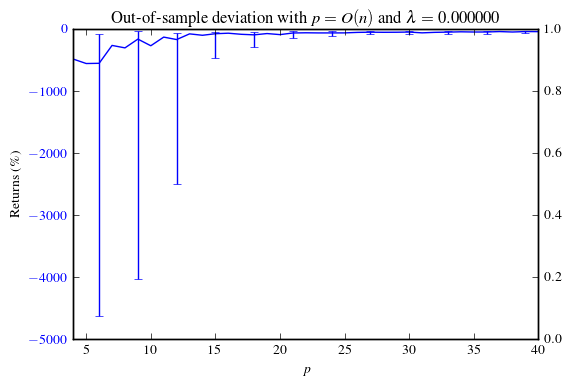

In [204]:
fig4_oos = plt.figure()
ax14_oos = fig4_oos.add_subplot(111)
ax24_oos = ax14_oos.twinx()

ax14_oos.errorbar(ps4,center_CE4,yerr=[top_CE4,bottom_CE4],color='b')
ax14_oos.axis(xmin=min(ps4))
ax14_oos.set_xlabel('$p$')
ax14_oos.set_ylabel('Returns (\%)');
for t in ax14_oos.get_yticklabels():
   t.set_color('b')

# ax24_oos.errorbar(ns4,center_bound4,yerr=[top_bound4,bottom_bound4],color='r')
# ax24_oos.axis(xmin=min(ns4),ymax=0,ymin=-1000000)
# for t in ax24_oos.get_yticklabels():
#     t.set_color('r')

ax14_oos.set_title('Out-of-sample deviation with $p=O(n)$ and $\lambda = %f$' % λ);

In [0]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [5]:
# Experiment parameters.

n_true = 50000
n_experiments = 50
λ = 3
δ = 0.2

r_threshold = 60
β = 0.5
u = ut.LinearPlateauUtility(β,r_threshold)

In [6]:
p_true = 40
R_true = NormalDistribution(5,10)
X_true = [RademacherDistribution() for _ in range(p_true)]
M_true = synth.GaussianMarket(X_true,R_true)

NameError: name 'RademacherDistribution' is not defined

In [239]:
ns1 = sz*10
ps1 = np.ones_like(sz)*p_true
np.array([ps1,ns1]).T

array([[ 40,  40],
       [ 40,  50],
       [ 40,  60],
       [ 40,  70],
       [ 40,  80],
       [ 40,  90],
       [ 40, 100],
       [ 40, 110],
       [ 40, 120],
       [ 40, 130],
       [ 40, 140],
       [ 40, 150],
       [ 40, 160],
       [ 40, 170],
       [ 40, 180],
       [ 40, 190],
       [ 40, 200],
       [ 40, 210],
       [ 40, 220],
       [ 40, 230],
       [ 40, 240],
       [ 40, 250],
       [ 40, 260],
       [ 40, 270],
       [ 40, 280],
       [ 40, 290],
       [ 40, 300],
       [ 40, 310],
       [ 40, 320],
       [ 40, 330],
       [ 40, 340],
       [ 40, 350],
       [ 40, 360],
       [ 40, 370],
       [ 40, 380],
       [ 40, 390],
       [ 40, 400]])

In [241]:
# Experiment parameters.

n_true = 5000
n_experiments = 50
λ = 3
δ = 0.2

r_threshold = 60
β = 1
u = ut.LinearPlateauUtility(β,r_threshold)

In [243]:
X,R = M_true.sample(n_true)
M = synth.MarketDiscreteDistribution(X,R)

In [244]:
p_star = pr.Problem(X,R,λ=0,u=u)
p_star.solve()
q_star = p_star.q

20  -1.910e+01  -1.910e+01  +1e-08  3e-15  2e-10  2e-13  8e-13  0.9890  1e-02   1  0  0 |  0  0

OPTIMAL (within feastol=1.8e-10, reltol=6.3e-10, abstol=1.2e-08).
Runtime: 1.511396 seconds.

18  -1.910e+01  -1.910e+01  +4e-05  1e-11  1e-07  8e-10  3e-09  0.9890  3e-01   1  0  0 |  0  0
19  -1.910e+01  -1.910e+01  +5e-07  1e-13  4e-09  1e-11  3e-11  0.9890  2e-03   1  0  0 |  0  0
16  -1.910e+01  -1.910e+01  +9e-04  2e-10  3e-06  2e-08  6e-08  0.9890  2e-01   1  0  0 |  0  0
17  -1.910e+01  -1.910e+01  +2e-04  4e-11  5e-07  3e-09  1e-08  0.8359  1e-02   1  0  0 |  0  0
14  -1.910e+01  -1.910e+01  +8e-03  2e-09  3e-05  1e-07  5e-07  0.9890  2e-01   1  0  0 |  0  0
15  -1.910e+01  -1.910e+01  +4e-03  1e-09  1e-05  8e-08  3e-07  0.5315  1e-01   1  0  0 |  0  0
12  -1.909e+01  -1.911e+01  +7e-02  2e-08  3e-04  2e-06  5e-06  0.7235  1e-01   0  0  0 |  0  0
13  -1.910e+01  -1.911e+01  +3e-02  8e-09  1e-04  8e-07  2e-06  0.6426  9e-02   1  0  0 |  0  0
10  -1.902e+01  -1.919e+01  +6e-01  1e-07

In [0]:
ns1 = sz*10
ps1 = np.ones_like(sz)*p_true
np.array([ps1,ns1]).T